# Multi-Class Prediction of Cirrhosis Outcomes

**Your Goal: For this Episode of the Series, your task is to use a multi-class approach to predict the the outcomes of patients with cirrhosis. Good luck!**

For each id row in the test set, you must predict probabilities of the three outcomes Status_C, Status_CL, and Status_D . 

## Importing libraries:

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

## Loading data:

In [3]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e26/test.csv')

In [4]:
train_df.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0   0     999  D-penicillamine  21532   M       N            N       N     N   
1   1    2574          Placebo  19237   F       N            N       N     N   
2   2    3428          Placebo  13727   F       N            Y       Y     Y   
3   3    2576          Placebo  18460   F       N            N       N     N   
4   4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     3.65    63.0    1181.0  125.55           96.0   

   Platelets  Prothrombin  Stage Status  
0      394.0          9.7    3.0      D  
1      361.0         11.0    3.0      C  
2      199.0         11.7    4.0      D  
3      269.0         10.7    3.0      C  
4      298.0         10.6    4.0      C

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [6]:
test_df.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0  7905    3839  D-penicillamine  19724   F       N            Y       N   
1  7906    2468  D-penicillamine  14975   F       N            N       N   
2  7907      51          Placebo  13149   F       N            Y       N   
3  7908    2330  D-penicillamine  20510   F       N            N       N   
4  7909    1615  D-penicillamine  21904   F       N            Y       N   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     N        1.2        546.0     3.37    65.0    1636.0  151.90   
1     N        1.1        660.0     4.22    94.0    1257.0  151.90   
2     Y        2.0        151.0     2.96    46.0     961.0   69.75   
3     N        0.6        293.0     3.85    40.0     554.0  125.55   
4     N        1.4        277.0     2.97   121.0    1110.0  125.00   

   Tryglicerides  Platelets  Prothrombin  Stage  
0           90.0      430.0         10.6    2.0  
1          155.0      227.0         10.0    2.0  
2          101.0      213.0         13.0    4.0  
3           56.0      270.0         10.6    2.0  
4          126.0      221.0          9.8    1.0

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

**The dataset has no missing values**

### Exploring numerical values

In [8]:
numerical_col=train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_col.remove('Stage')
numerical_col.remove('id')
numerical_col.append('Status')
numerical_col

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Status']

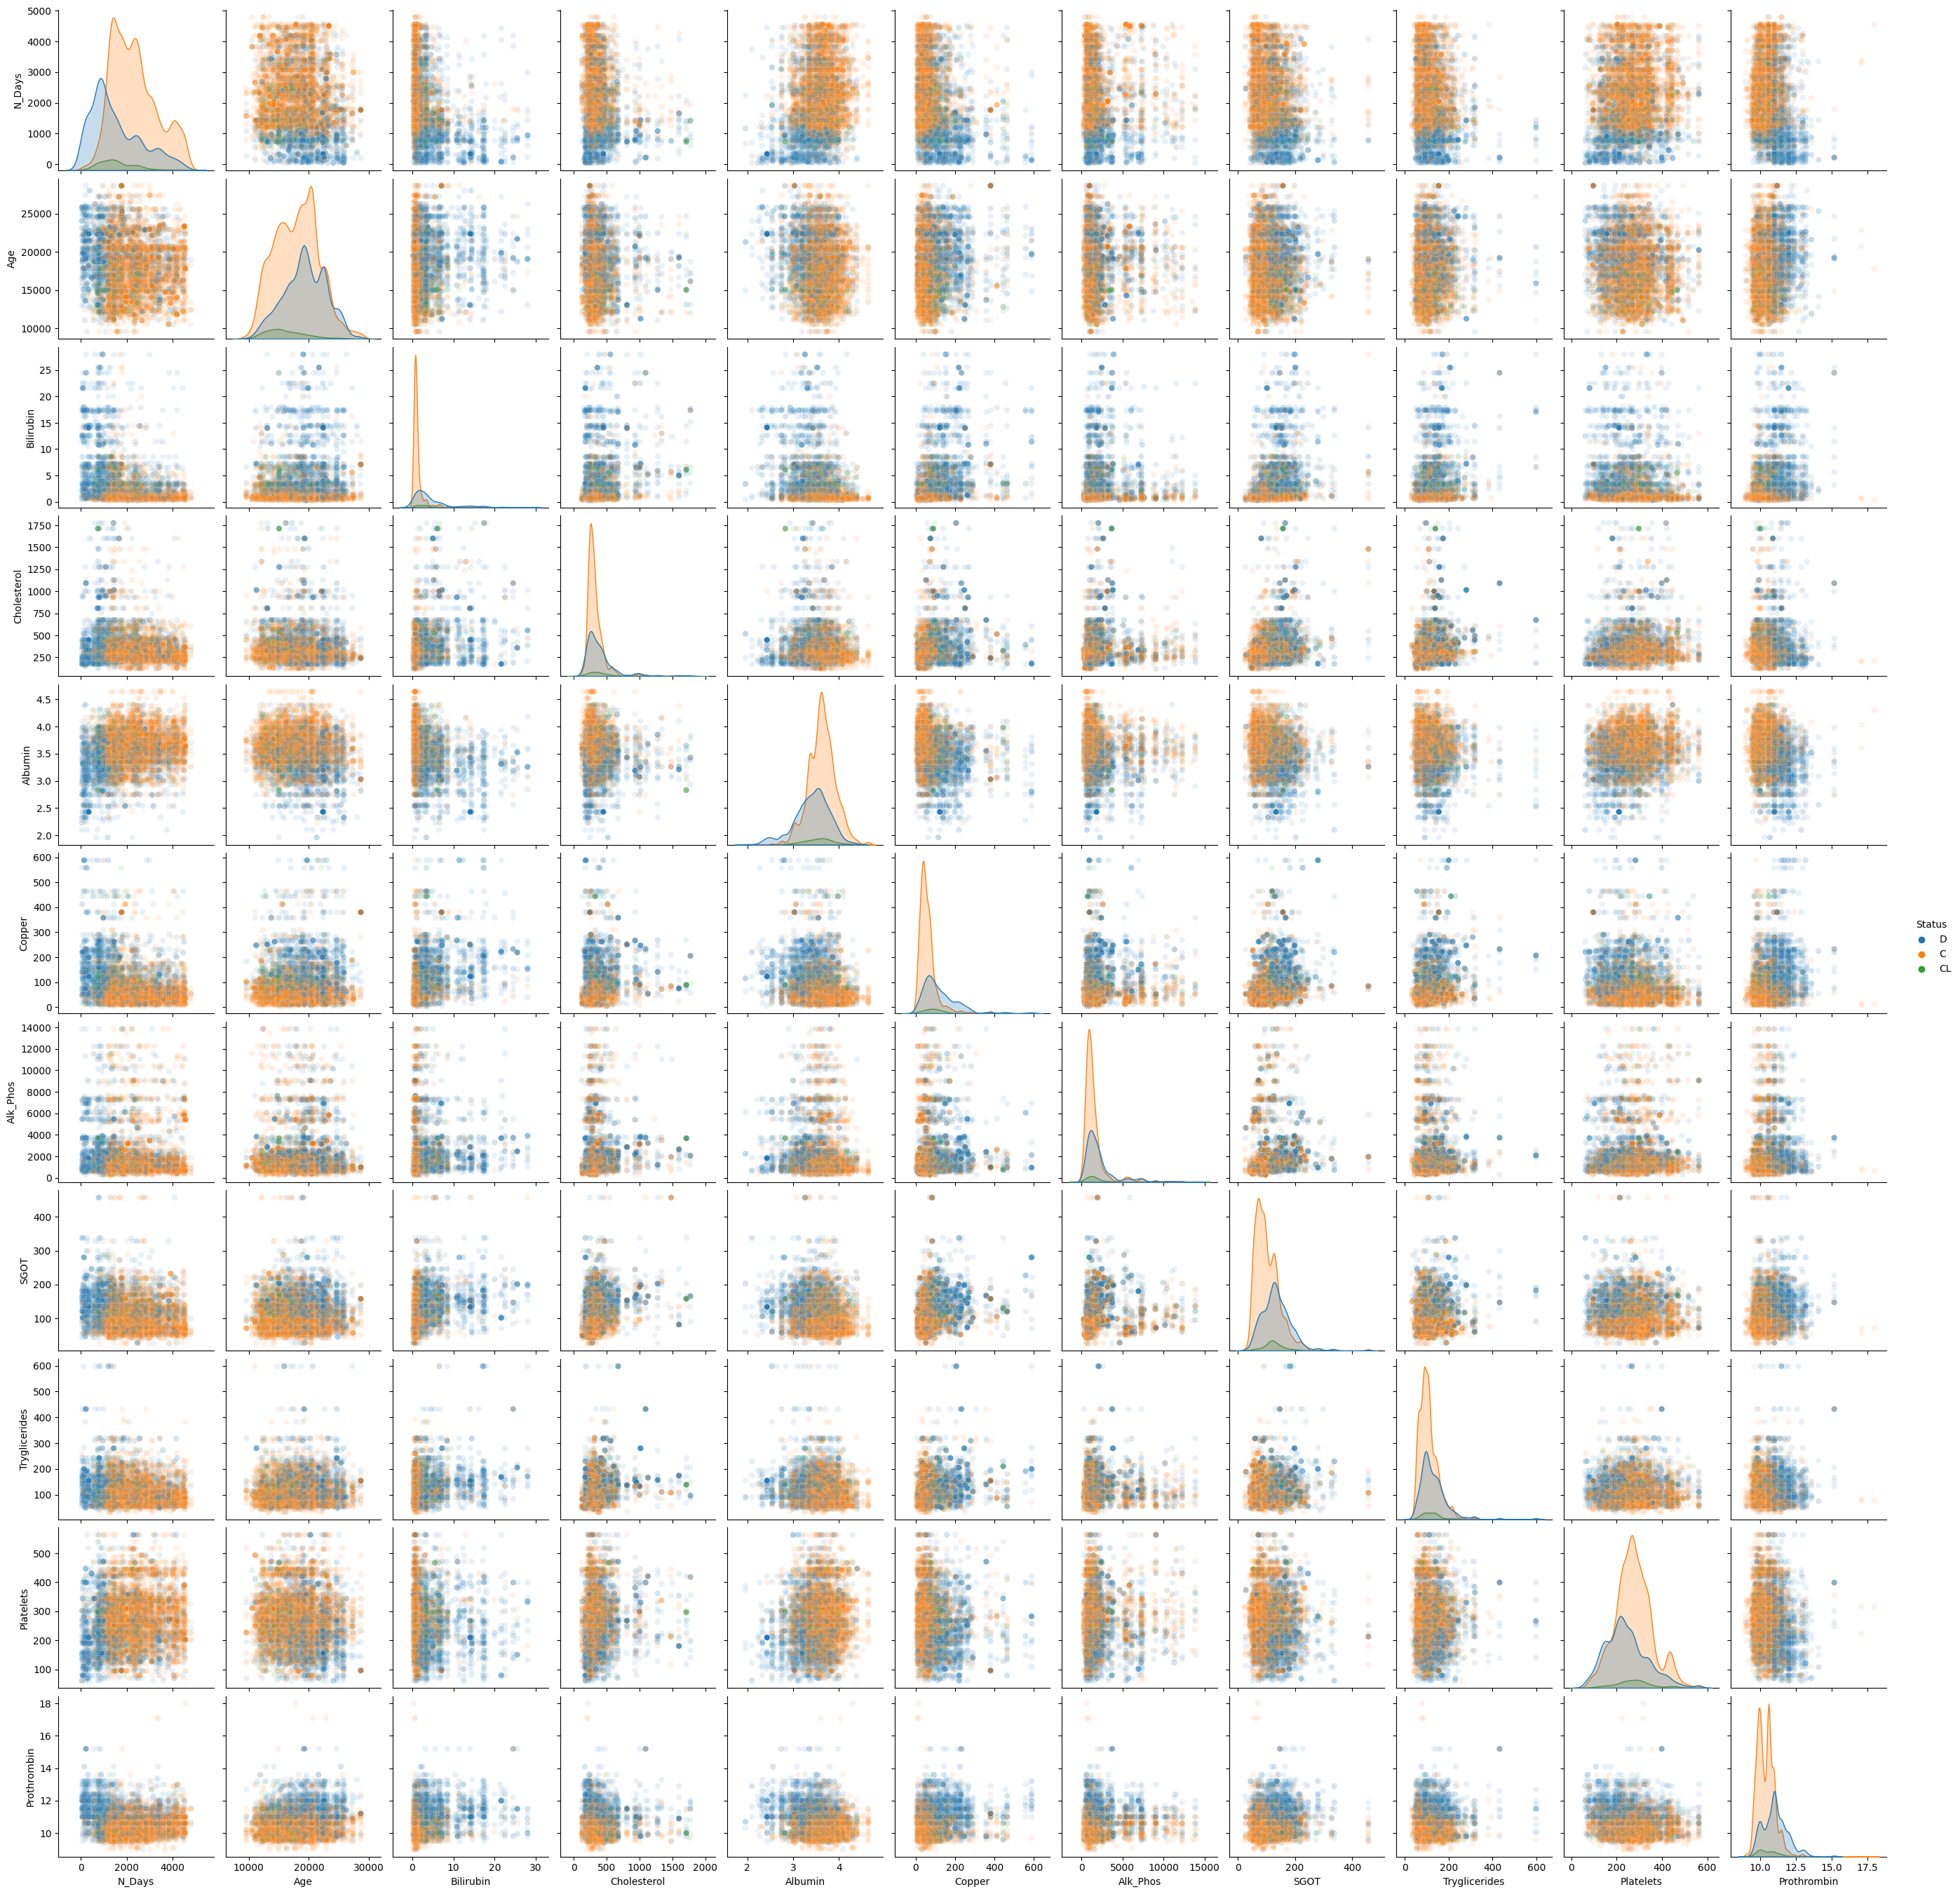

In [9]:
sns.pairplot(kind='scatter', data=train_df[numerical_col], hue='Status', plot_kws={'alpha':0.1})

<Axes: >

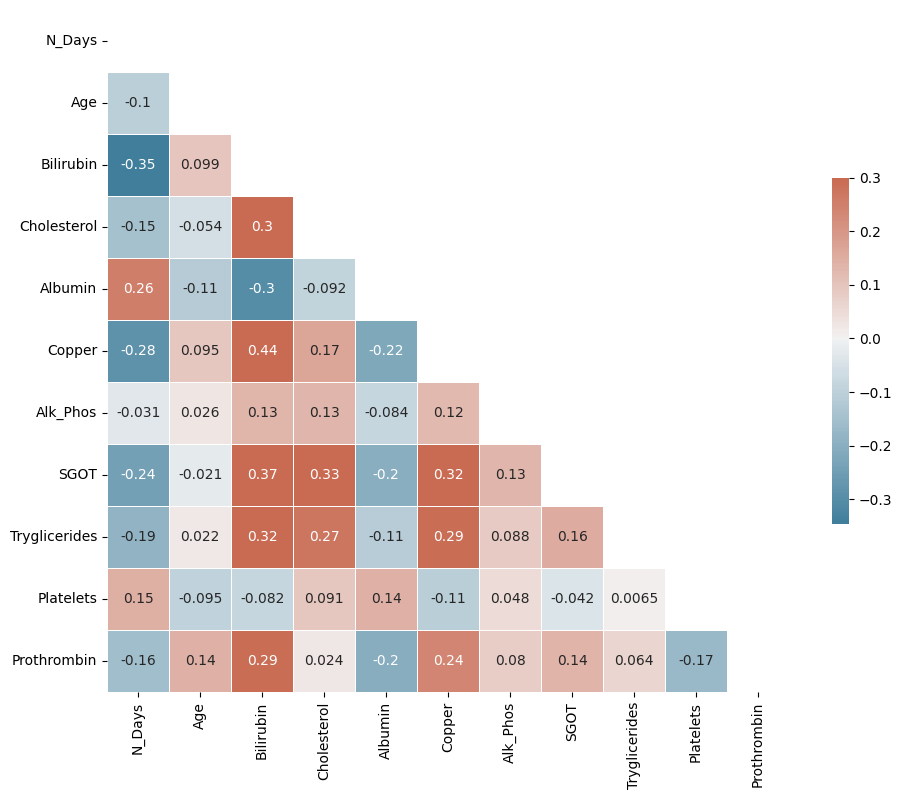

In [10]:
corr = train_df[numerical_col].corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [11]:
train_df[train_df['Status']=='D'][numerical_col].describe().transpose()

count          mean          std      min      25%       50%  \
N_Days         2665.0   1528.849156  1107.608074    41.00    769.0   1216.00   
Age            2665.0  19345.741839  3521.119287  9598.00  16898.0  19256.00   
Bilirubin      2665.0      4.857486     5.297413     0.30      1.3      3.20   
Cholesterol    2665.0    398.027392   249.010071   120.00    248.0    331.00   
Albumin        2665.0      3.405715     0.388078     1.96      3.2      3.45   
Copper         2665.0    123.694934    92.374342     4.00     60.0    101.00   
Alk_Phos       2665.0   2226.068893  2097.469501   289.00   1009.0   1580.00   
SGOT           2665.0    135.211276    51.010147    26.35    102.3    130.20   
Tryglicerides  2665.0    129.375985    63.848272    33.00     90.0    114.00   
Platelets      2665.0    243.503940    93.122026    62.00    181.0    228.00   
Prothrombin    2665.0     11.055797     0.868020     9.00     10.5     11.00   

                    75%       max  
N_Days          2297.00   4795.00  
Age            22336.00  28650.00  
Bilirubin          6.40     28.00  
Cholesterol      448.00   1775.00  
Albumin            3.67      4.40  
Copper           159.00    588.00  
Alk_Phos        2374.00  13862.40  
SGOT             164.30    457.25  
Tryglicerides    154.00    598.00  
Platelets        297.00    563.00  
Prothrombin       11.50     15.20

In [12]:
train_df[train_df['Status']=='C'][numerical_col].describe().transpose()

count          mean          std      min       25%       50%  \
N_Days         4965.0   2322.529305   989.946056    41.00   1487.00   2216.00   
Age            4965.0  17969.769587  3657.705623  9598.00  15056.00  18137.00   
Bilirubin      4965.0      1.362699     1.888044     0.30      0.60      0.80   
Cholesterol    4965.0    322.078751   144.914094   120.00    248.00    288.00   
Albumin        4965.0      3.624918     0.295335     2.23      3.44      3.61   
Copper         4965.0     61.491641    53.460053     4.00     34.00     50.00   
Alk_Phos       4965.0   1596.690715  1755.570517   289.00    754.00   1082.00   
SGOT           4965.0    102.832914    44.016247    26.35     71.30     93.00   
Tryglicerides  4965.0    107.406647    43.831604    33.00     80.00    101.00   
Platelets      4965.0    276.215106    82.205897    62.00    225.00    271.00   
Prothrombin    4965.0     10.405076     0.628701     9.00      9.90     10.40   

                   75%       max  
N_Days          2976.0   4795.00  
Age            20510.0  28650.00  
Bilirubin          1.2     28.00  
Cholesterol      360.0   1775.00  
Albumin            3.8      4.64  
Copper            73.0    588.00  
Alk_Phos        1636.0  13862.40  
SGOT             127.1    457.25  
Tryglicerides    128.0    598.00  
Platelets        324.0    563.00  
Prothrombin       10.8     18.00

In [13]:
grouped_df = train_df.groupby('Status')[numerical_col].median(numeric_only=True)
grouped_df

N_Days      Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
Status                                                                       
C       2216.0  18137.0        0.8        288.0     3.61    50.0    1082.0   
CL      1435.0  15112.0        2.9        336.0     3.57    89.0    1273.0   
D       1216.0  19256.0        3.2        331.0     3.45   101.0    1580.0   

         SGOT  Tryglicerides  Platelets  Prothrombin  
Status                                                
C        93.0          101.0      271.0         10.4  
CL      120.9          118.0      271.0         10.6  
D       130.2          114.0      228.0         11.0

**Bilirubin, Copper, Alk_Phos and SGOT seems to have highest difference where patient Died (status D) or not.** \
**I will use them to create new features later in chapter Feature engineering**

### Exploring categorical values

In [14]:
categorical_col = [col for col in train_df.columns.tolist() if col not in numerical_col]
categorical_col.remove('id')

for col in categorical_col:
    print(f'Unique values in {col}:')
    print(train_df[col].unique())

Unique values in Drug:
['D-penicillamine' 'Placebo']
Unique values in Sex:
['M' 'F']
Unique values in Ascites:
['N' 'Y']
Unique values in Hepatomegaly:
['N' 'Y']
Unique values in Spiders:
['N' 'Y']
Unique values in Edema:
['N' 'Y' 'S']
Unique values in Stage:
[3. 4. 2. 1.]


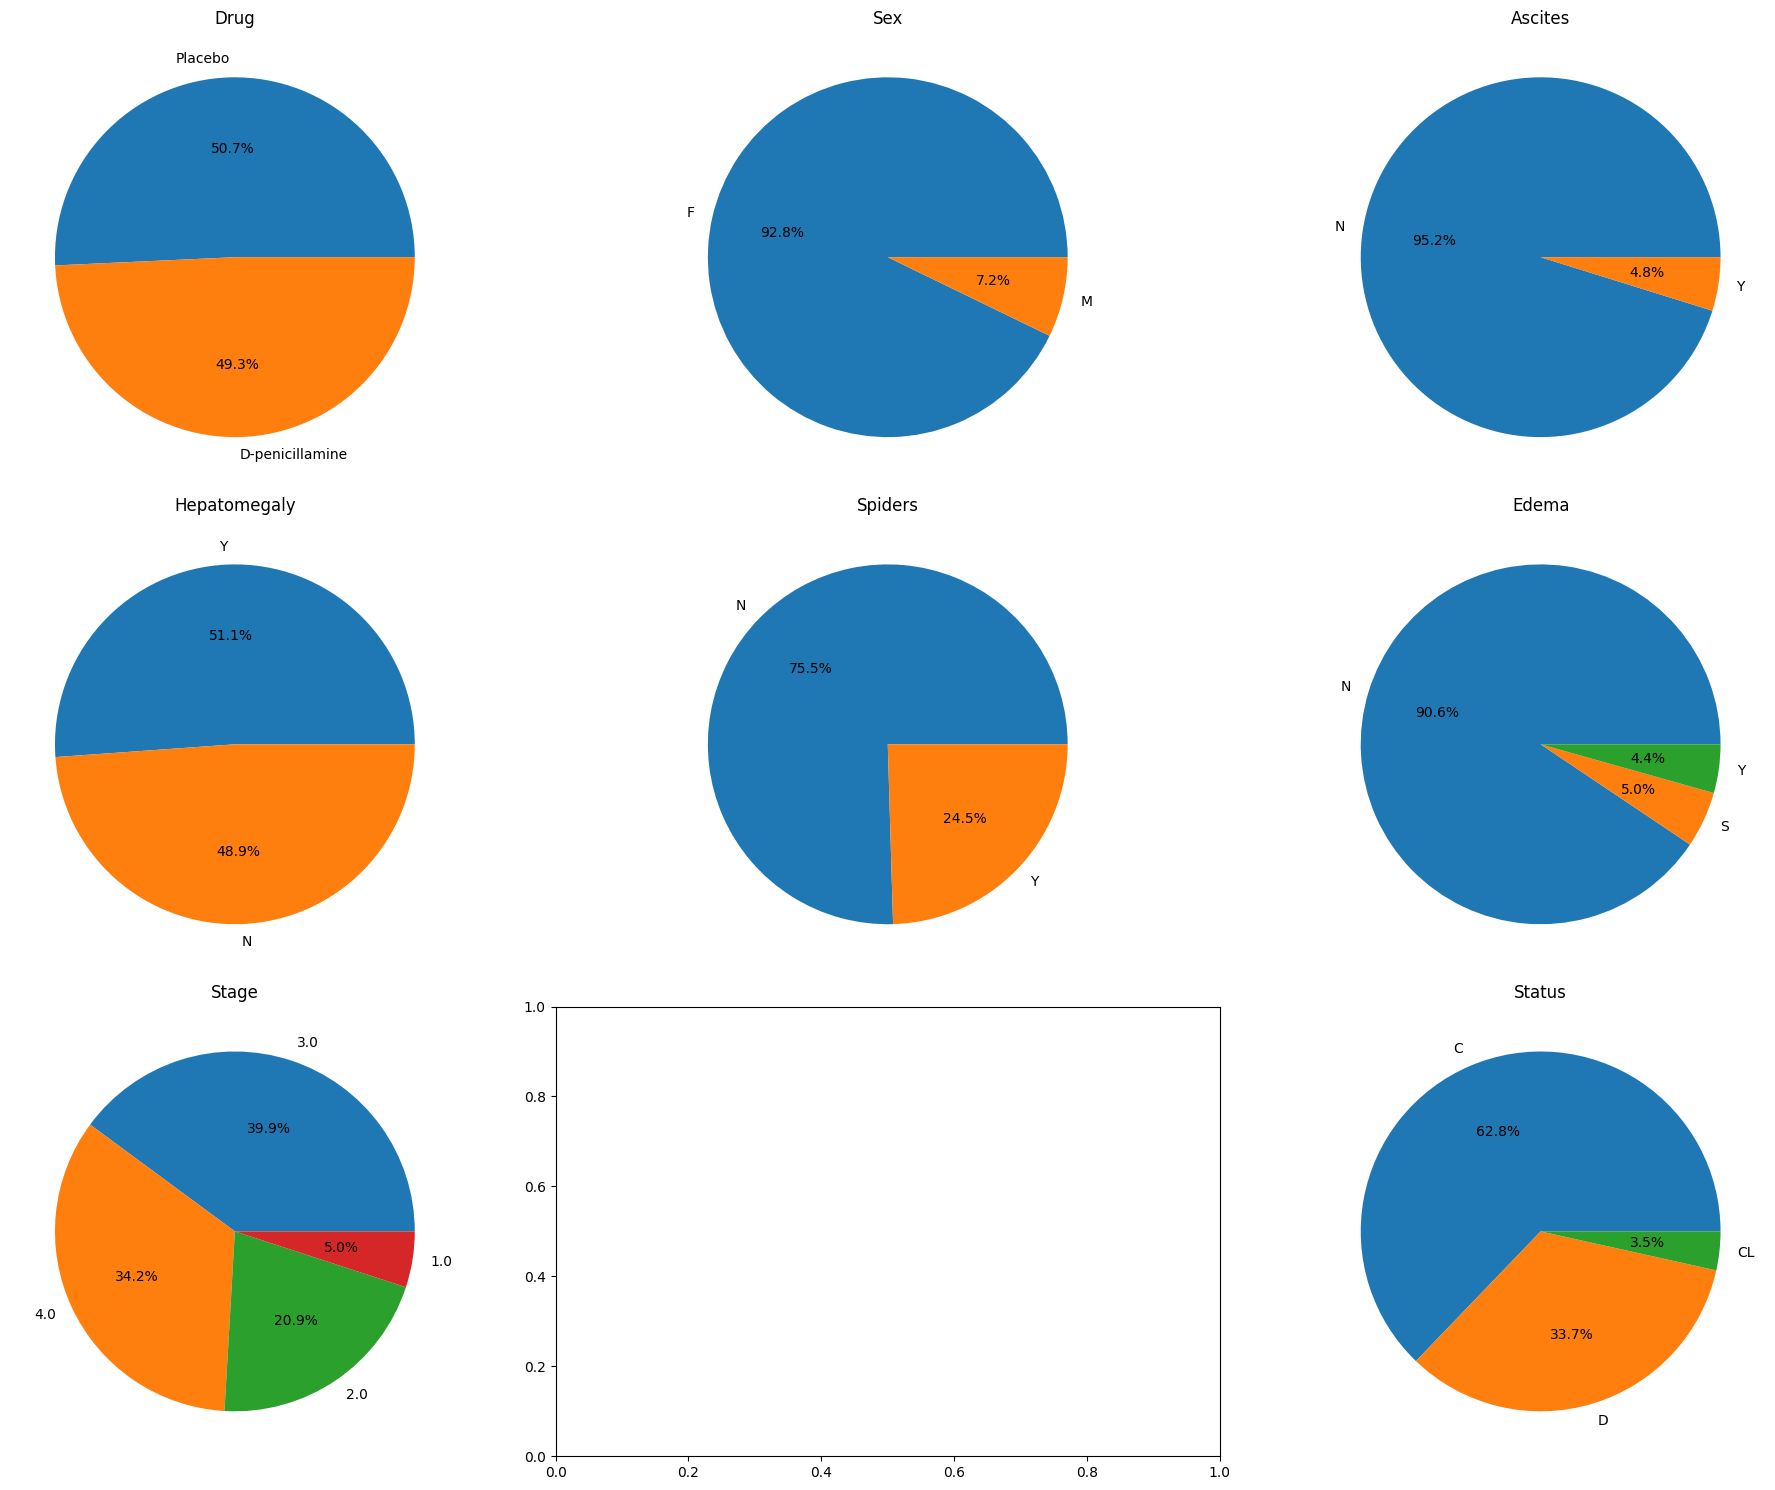

In [15]:
fig, axs = plt.subplots(3, 3, figsize=(20,15))
axs = axs.ravel() # flattens the array to easily iterate over it

for i in range(len(categorical_col)):
    axs[i].pie(train_df[categorical_col[i]].value_counts(),autopct='%1.1f%%',
                labels=train_df[categorical_col[i]].value_counts().index)
    axs[i].set_title(categorical_col[i])

# In this line, adjust the index to an available subplot
axs[8].pie(train_df['Status'].value_counts(),autopct='%1.1f%%',
           labels=train_df['Status'].value_counts().index)
axs[8].set_title('Status')

plt.tight_layout()

In [16]:
def get_pie_chart(categorical_var, size=(10,3)):
    fig, axs = plt.subplots(1, train_df[categorical_var].nunique(), figsize=size)

    for j, x in enumerate(train_df[categorical_var].unique()):
        df = train_df[train_df[categorical_var] == x]
        status_counts = df['Status'].value_counts() 
        axs[j].pie(status_counts, autopct='%1.1f%%',labels=['C','D','CL'], colors=['green','red','yellow'])
        axs[j].set_title(f'Distribution for {categorical_var} = {x}')
        
    plt.tight_layout()

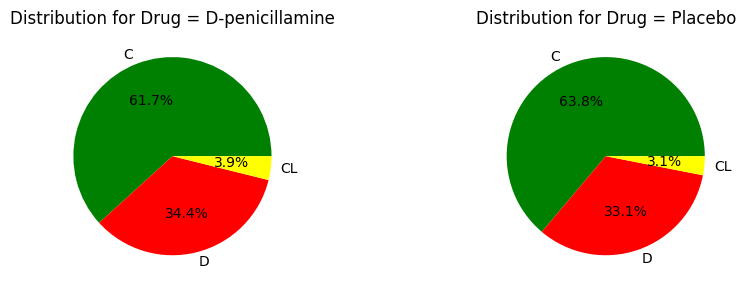

In [17]:
get_pie_chart('Drug',)

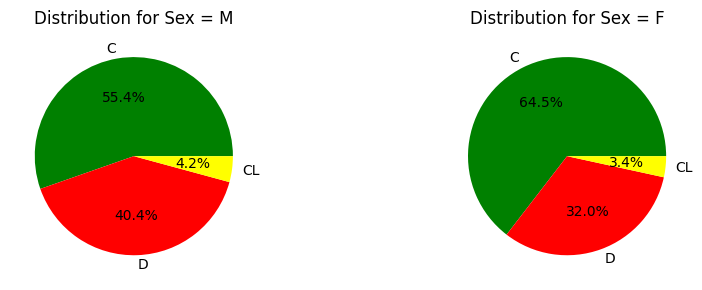

In [18]:
get_pie_chart('Sex',)

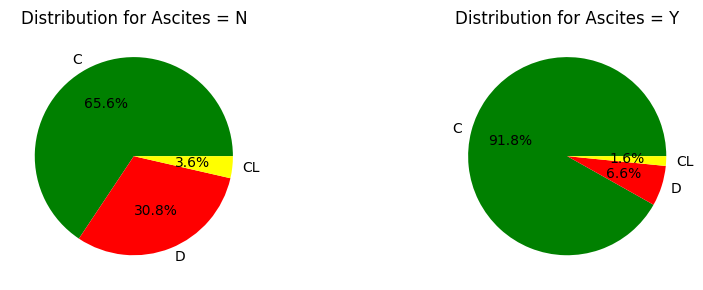

In [19]:
get_pie_chart('Ascites',)

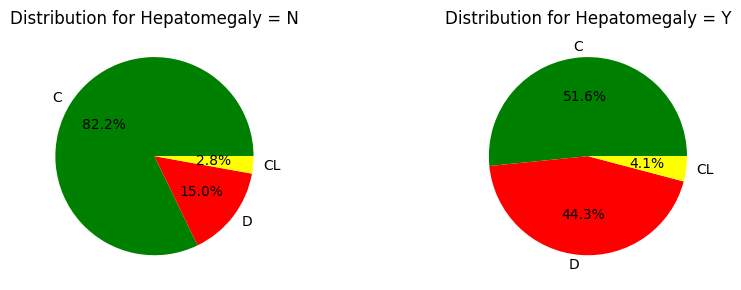

In [20]:
get_pie_chart('Hepatomegaly',)

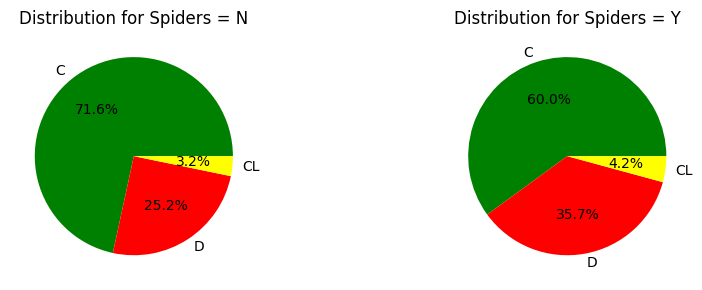

In [21]:
get_pie_chart('Spiders',)

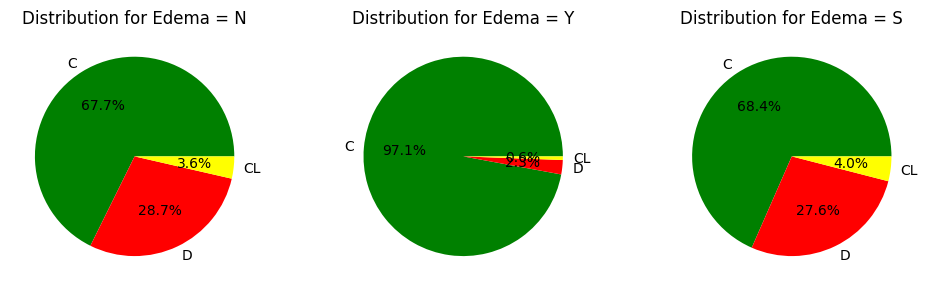

In [22]:
get_pie_chart('Edema',)

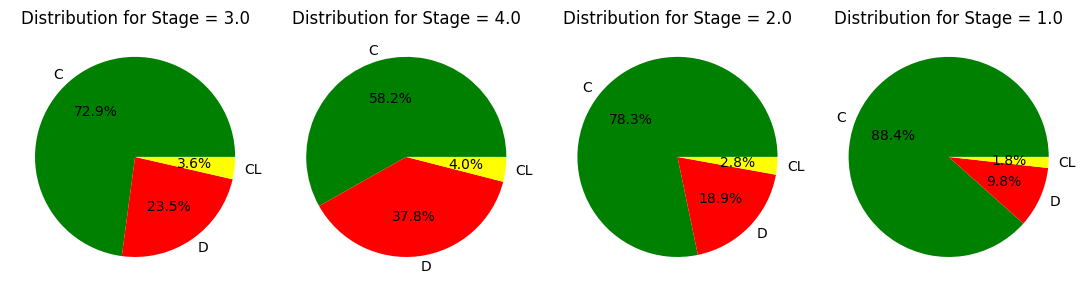

In [23]:
get_pie_chart('Stage',(11,5))

Only Drug feature is not affecting the final Status. Other features are important.

## Feature Engineering

In [24]:
imp_features = ['Bilirubin', 'Copper', 'Alk_Phos', 'SGOT']

In [25]:
# I will set a threshold to these values. Patients above this 75% quantile have out of normal values.
quantiles_for_C = train_df[train_df['Status'] == 'C'][imp_features].quantile(0.75)
quantiles_for_C

Bilirubin       1.2
Copper         73.0
Alk_Phos     1636.0
SGOT          127.1
Name: 0.75, dtype: float64

In [26]:
for n in range(len(quantiles_for_C)):
    train_df[f'{quantiles_for_C.index[n]}_high'] = np.where(train_df[quantiles_for_C.index[n]] > quantiles_for_C[n],1,0)
    test_df[f'{quantiles_for_C.index[n]}_high'] = np.where(test_df[quantiles_for_C.index[n]] > quantiles_for_C[n],1,0)

In [27]:
train_df.head(3)

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0   0     999  D-penicillamine  21532   M       N            N       N     N   
1   1    2574          Placebo  19237   F       N            N       N     N   
2   2    3428          Placebo  13727   F       N            Y       Y     Y   

   Bilirubin  ...    SGOT  Tryglicerides  Platelets  Prothrombin  Stage  \
0        2.3  ...  179.80           63.0      394.0          9.7    3.0   
1        0.9  ...  134.85           88.0      361.0         11.0    3.0   
2        3.3  ...  119.35           50.0      199.0         11.7    4.0   

   Status  Bilirubin_high  Copper_high  Alk_Phos_high SGOT_high  
0       D               1            1              0         1  
1       C               0            0              0         1  
2       D               1            1              0         0  

[3 rows x 24 columns]

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              7905 non-null   int64  
 1   N_Days          7905 non-null   int64  
 2   Drug            7905 non-null   object 
 3   Age             7905 non-null   int64  
 4   Sex             7905 non-null   object 
 5   Ascites         7905 non-null   object 
 6   Hepatomegaly    7905 non-null   object 
 7   Spiders         7905 non-null   object 
 8   Edema           7905 non-null   object 
 9   Bilirubin       7905 non-null   float64
 10  Cholesterol     7905 non-null   float64
 11  Albumin         7905 non-null   float64
 12  Copper          7905 non-null   float64
 13  Alk_Phos        7905 non-null   float64
 14  SGOT            7905 non-null   float64
 15  Tryglicerides   7905 non-null   float64
 16  Platelets       7905 non-null   float64
 17  Prothrombin     7905 non-null   f

Unfortunately these engineered features didn`t help the model performance at all.\
I tried running the model without them, and accuracy was the same

## Encoding categorical values

In [29]:
categorical_col

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']

In [30]:
cols_to_encode = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


train_df_encoded = pd.get_dummies(train_df.drop('id',axis=1), columns=cols_to_encode, drop_first=True)
test_df_encoded = pd.get_dummies(test_df.drop('id',axis=1), columns=cols_to_encode, drop_first=True)

In [31]:
X = train_df_encoded.drop('Status', axis=1).values

In [32]:
X.shape

(7905, 23)

**One hot encode labels to be predicted**

In [33]:
y = train_df_encoded['Status']

In [34]:
def one_hot(a, num_classes):
    encoder = LabelEncoder()
    a = encoder.fit_transform(a)
    return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

In [35]:
y = one_hot(y.values, 3)

In [36]:
y.shape

(7905, 3)

## Splitting the data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Scaling the data

In [38]:
scaler = MinMaxScaler(feature_range=(0,1))
     
X_train_scaled = scaler.fit_transform(X_train)
     
X_test_scaled = scaler.transform(X_test)

## Create the model 

In [39]:
model = Sequential()
model.add(Dense(23, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [40]:
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=2, restore_best_weights=True)

In [41]:
model.fit(x=X_train_scaled, 
          y=y_train, 
          epochs=50, 
          validation_data=(X_test_scaled, y_test),
          verbose=1,
          callbacks=[early_stop])
     

Epoch 1/50
223/223 [==============================] - 2s 3ms/step - loss: 0.7916 - accuracy: 0.6378 - val_loss: 0.5912 - val_accuracy: 0.7889
Epoch 2/50
223/223 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.7733 - val_loss: 0.5589 - val_accuracy: 0.7977
Epoch 3/50
223/223 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.7813 - val_loss: 0.5478 - val_accuracy: 0.7939
Epoch 4/50
223/223 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7838 - val_loss: 0.5458 - val_accuracy: 0.8015
Epoch 5/50
223/223 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.7917 - val_loss: 0.5401 - val_accuracy: 0.8040
Epoch 6/50
223/223 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7920 - val_loss: 0.5328 - val_accuracy: 0.8040
Epoch 7/50
223/223 [==============================] - 0s 2ms/step - loss: 0.5324 - accuracy: 0.7934 - val_loss: 0.5288 - val_accuracy: 0.8003
Epoch 

<Axes: >

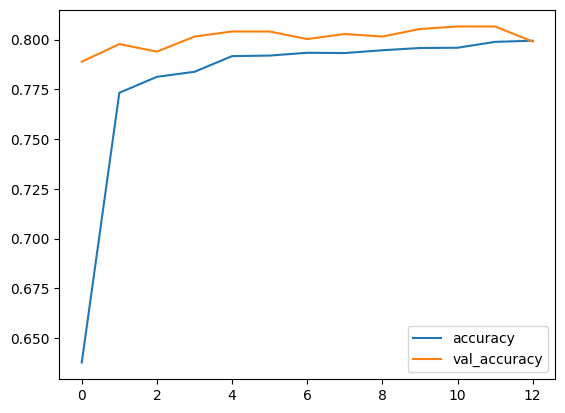

In [42]:
model_acc = pd.DataFrame(model.history.history)
model_acc[['accuracy','val_accuracy']].plot()

In [43]:
y_prob = model.predict(X_test_scaled)

# Predict class labels
y_pred = np.argmax(y_prob, axis=-1)

25/25 [==============================] - 0s 1ms/step


In [44]:
y_pred

array([0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0,

In [45]:
y_test_classes = np.argmax(y_test, axis=-1)

In [46]:
y_test_classes

array([0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0,

In [47]:
print(classification_report(y_test_classes, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       480
           1       0.00      0.00      0.00        23
           2       0.79      0.69      0.74       288

    accuracy                           0.81       791
   macro avg       0.53      0.54      0.53       791
weighted avg       0.78      0.81      0.79       791



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
print(confusion_matrix(y_test_classes, y_pred))

[[439   0  41]
 [ 10   0  13]
 [ 89   0 199]]


## Predict labels for submission

In [49]:
submission_sample = pd.read_csv('/kaggle/input/playground-series-s3e26/sample_submission.csv')

In [50]:
X_test_final_scaled = scaler.transform(test_df_encoded.values)

In [51]:
final_predictions = model.predict(X_test_final_scaled)

165/165 [==============================] - 0s 1ms/step


In [52]:
final_predictions_df = pd.DataFrame(final_predictions, columns=['Status_C', 'Status_CL', 'Status_D'])

# Concatenate submission_sample ID column with final_predictions array
submission = pd.concat([submission_sample['id'], final_predictions_df], axis=1)


submission.to_csv('/kaggle/working/submission.csv', index=False)

In [53]:
submission.head()

id  Status_C  Status_CL  Status_D
0  7905  0.836506   0.069064  0.441794
1  7906  0.871418   0.134441  0.438323
2  7907  0.268361   0.144060  0.867715
3  7908  0.910170   0.068533  0.330637
4  7909  0.657321   0.233857  0.512235